# Introduction
- In this notebook we will create a Machine Learning model to predict death situation of COVID-19.

## About The Dataset
#### This dataset contains an enormous number of anonymized patient-related information, including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means “yes” and 2 means “no”. Values as 97 and 99 are missing data.
- sex: female or male
- age: of the patient.
- classification: COVID-19 test findings. Values 1-3 mean that the patient was diagnosed with COVID-19 in different degrees. 4 or higher means that the patient is not a carrier of COVID-19 or that the test is inconclusive.
- patient type: hospitalized or not hospitalized.
- pneumonia: whether the patient already has air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient has been admitted to an Intensive Care Unit.
- death: indicates whether the patient died or recovered.

In [1]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [2]:
%cd /content/gdrive/MyDrive/Python_4_ML

/content/gdrive/MyDrive/Python_4_ML


#### The notebook includes:
- Data Importing
- Data Preprocessing
- Data Preparing & Cleaning
- Missing Value Analysis
- Data Visualization
- Future Selection
- Creating Model
- Model Analysis
- Improving Model
- Solving Imbalance Dataset Problem With Undersampling

# Import Libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import time

import warnings
warnings.filterwarnings("ignore")

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import RobustScaler


from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

# Overview Dataset

In [4]:
covid = pd.read_csv("Covid_Data.csv")
print("Shape of dataset:\t", covid.shape)
covid.head()

Shape of dataset:	 (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [7]:
print("\tTHE NUMBER OF UNIQUE VALUES BY COLUMNS:")
covid.nunique()

	THE NUMBER OF UNIQUE VALUES BY COLUMNS:


USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [8]:
print("Number of NaN values:\t", covid.isna().sum().sum())

Number of NaN values:	 0


- We have no NaN values but we will have missing values.

In [9]:
covid.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [10]:
covid.PNEUMONIA.value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [11]:
covid.PREGNANT.value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [12]:
covid.INTUBED.value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

**Creating table for feature with missing value percentage**

In [13]:
perc=[]
for col in list(covid.columns):
   perc.append(round(len(covid[(covid[col]==97) | (covid[col]==98) | (covid[col]==98)])/len(covid)*100,2))

In [14]:
((pd.DataFrame([covid.columns, perc]).T).rename(columns={0: "Feature", 1: "Percentage"})).sort_values(by="Percentage", ascending=False)

,Feature,Percentage
20,ICU,80.92
5,INTUBED,80.92
8,PREGNANT,50.28
14,OTHER_DISEASE,0.48
12,INMSUPR,0.32
9,DIABETES,0.32
18,TOBACCO,0.31
13,HIPERTENSION,0.3
17,RENAL_CHRONIC,0.29
16,OBESITY,0.29


### **INFERENCE:**
1. We have no NaN values but values 97, 98 and 99 are considered as missing values.
2. We have some features that we expect them to have just 2 unique values but we see that these features have 3 or 4 unique values. For example the feature "PNEUMONIA" has 3 unique values (1, 2, 99) and "99" represents NaN values. Hence we will just take the rows that includes 1 and 2 values.
3. In "DATE_DIED" column, we have 971633 "9999-99-99" values which represent alive patients so i will take this feature as a "DEATH" that includes wether the patient died or not.

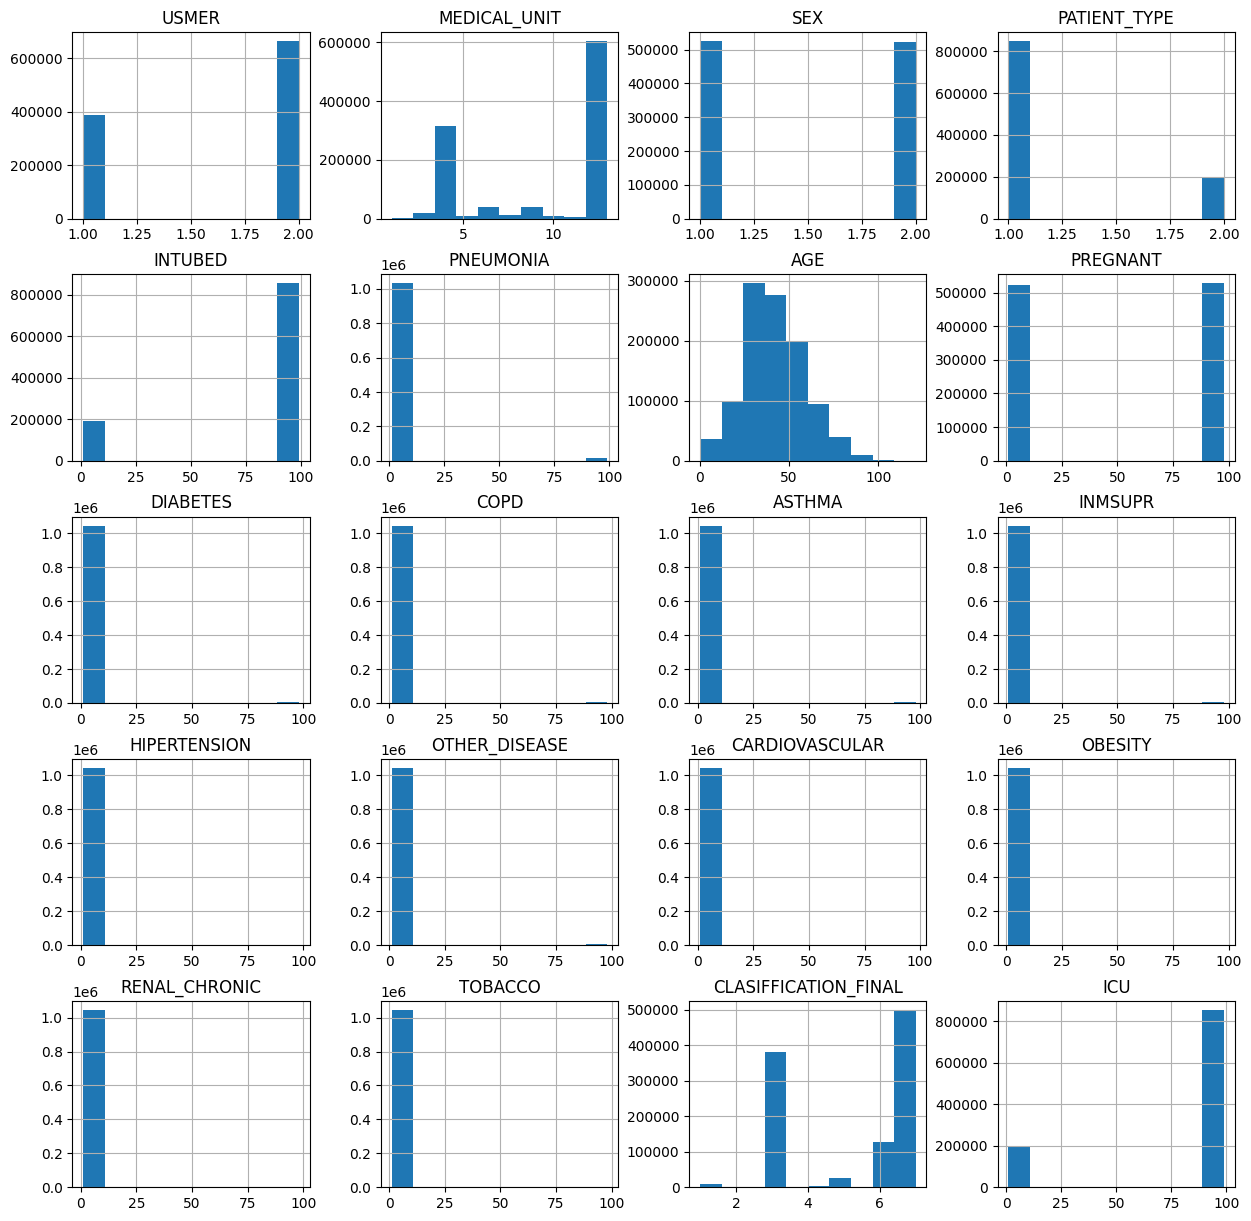

In [15]:
covid.hist(figsize=(15,15));

# Data Preprocessing

## Get rid of missing values, except for INTUBED, PREGNANT, ICU columns since they have too many

In [16]:
covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [17]:
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION',
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for col in cols :
    covid = covid[(covid[col] == 1)|(covid[col] == 2)]

## Pregnant-Sex Bar Plot

In [18]:
covid.SEX

0          1
1          2
2          2
3          1
4          2
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: SEX, Length: 1025152, dtype: int64

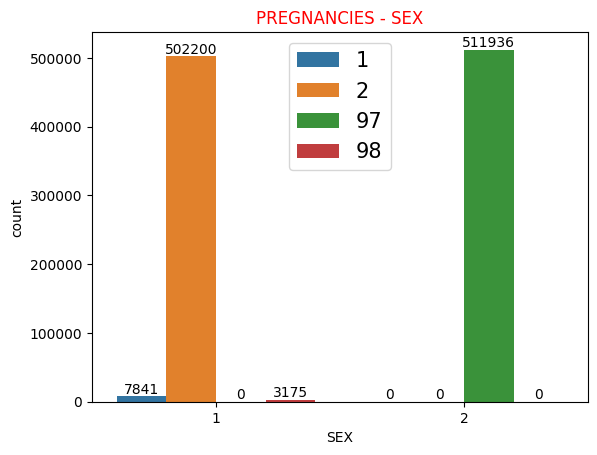

In [19]:
plt.figure()
# ax = sns.countplot(covid.SEX, hue=covid.PREGNANT)
ax = sns.countplot(data = covid, x= 'SEX', hue= 'PREGNANT')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX", color="red")
plt.legend(loc='upper center', fontsize=15)
plt.show()

- We see that the 'male' column has 511936 missing values which are supposed to be 'no' as man can not be pregnant. So I decide to change these missing values to '2' meaning no.

In [20]:
# Converting 97 to 2
covid.PREGNANT = covid.PREGNANT.replace(97, 2)
# Remove missing values
covid = covid[(covid.PREGNANT ==1 ) | (covid.PREGNANT == 2)]
covid.PREGNANT.value_counts()

2    1014136
1       7841
Name: PREGNANT, dtype: int64

## Missing value analysis of “INTUBED” feature

Text(0.5, 1.0, 'Count of Intubed')

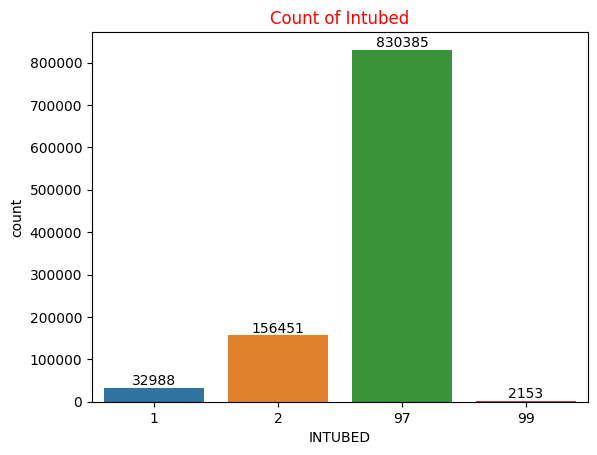

In [21]:
# ax = sns.countplot(covid.INTUBED)
ax = sns.countplot(data=covid, x='INTUBED')
ax.containers
plt.bar_label(ax.containers[0])
plt.title("Count of Intubed", color="red")
plt.show()

## Missing value analysis of “ICU” feature

Text(0.5, 1.0, 'Count of ICU')

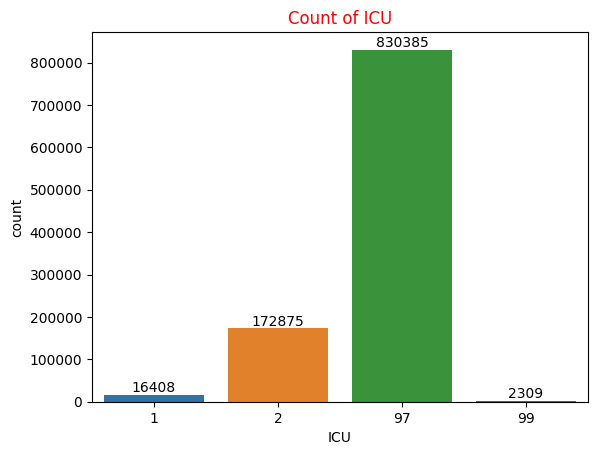

In [22]:
# ax = sns.countplot(covid.ICU)
ax = sns.countplot(data=covid, x='ICU')
plt.bar_label(ax.containers[0])
plt.title("Count of ICU", color="red")
plt.show()

## Preparing “DATE_DIED” column

In [23]:
# If we have “9999-99-99” values, that means this patient is alive.

covid["DEATH"] = [2 if each == "9999-99-99" else 1 for each in covid.DATE_DIED]
covid['DEATH'].value_counts()

2    947320
1     74657
Name: DEATH, dtype: int64

#### **COMMENT**:
- In the “INTUBED” and “ICU” features, there are too many missing values, so I will drop them. Also, we don't need “DATE_DIED” column anymore because we used this feature as a “DEATH” feature.

## Droping the columns

In [24]:
covid.drop(columns=["INTUBED", "ICU", "DATE_DIED"], inplace=True)

In [25]:
print("Size of dataset:\t", covid.shape, )
print("\n\tTHE NUMBER OF UNIQUE VALUES BY COLUMNS:")
covid.nunique()

Size of dataset:	 (1021977, 19)

	THE NUMBER OF UNIQUE VALUES BY COLUMNS:


USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
PNEUMONIA                 2
AGE                     121
PREGNANT                  2
DIABETES                  2
COPD                      2
ASTHMA                    2
INMSUPR                   2
HIPERTENSION              2
OTHER_DISEASE             2
CARDIOVASCULAR            2
OBESITY                   2
RENAL_CHRONIC             2
TOBACCO                   2
CLASIFFICATION_FINAL      7
DEATH                     2
dtype: int64

- As we see, we have just one numeric feature which is called “AGE” the rest of them are categorical.

# Data Visualization

Text(0.5, 1.0, 'Death Distribution')

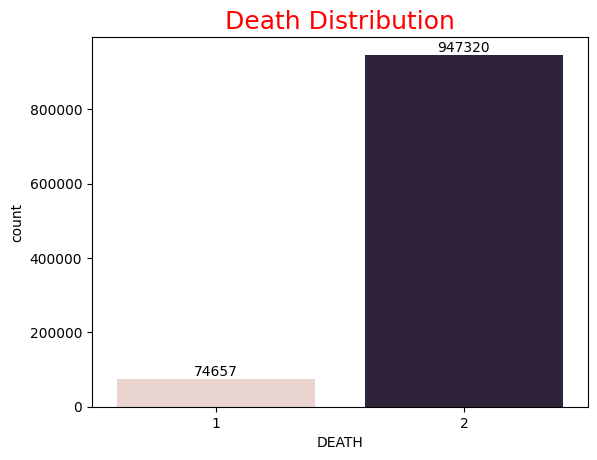

In [26]:
# ax = sns.countplot(covid.DEATH, palette=sns.cubehelix_palette(2))
ax = sns.countplot(data=covid, x='DEATH', palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18, color="red")
plt.show()

- The values are distributed unbalanced in target column. This will probably cause an imbalance problem. Nonetheless i want you to see the problem. Hence i will go ahead for now and if we meet this problem i will try to figure it out.

Text(0.5, 1.0, 'Age Distribution')

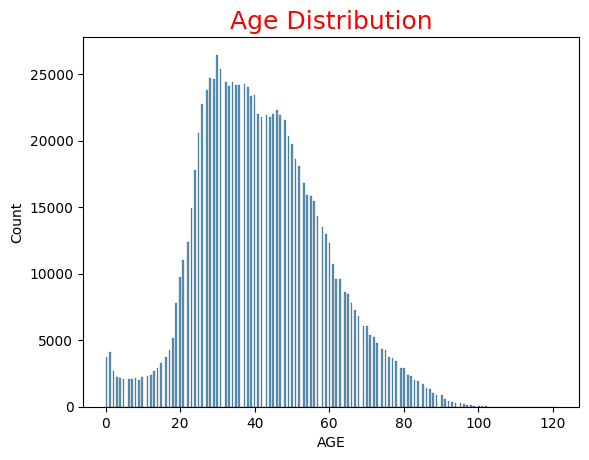

In [27]:
sns.histplot(x=covid.AGE)
plt.title("Age Distribution", color="red", fontsize=18)
plt.show()

- Patients are roughly between 20-60 years old.

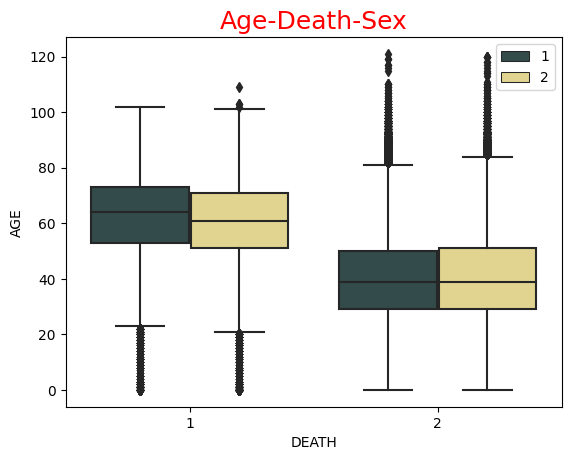

In [28]:
sns.boxplot(data=covid, x="DEATH", y="AGE", hue="SEX", palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18, color="red")
plt.legend(loc="best")
plt.show()

- The older patients are more likely to die compare to younger ones.
- There is no serious difference between males and females in terms of average rate of patients.

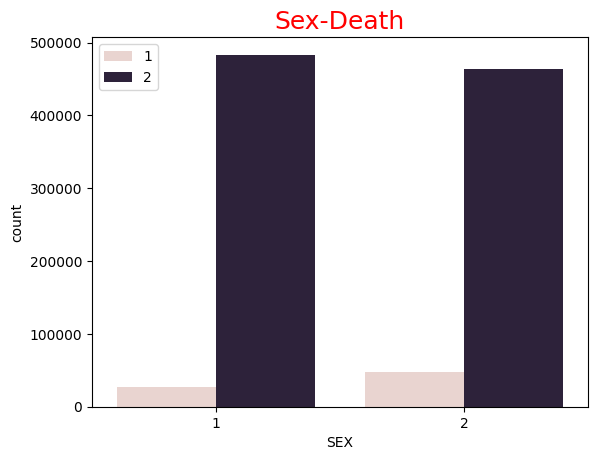

In [29]:
sns.countplot(data=covid, x='SEX', hue='DEATH', palette=sns.cubehelix_palette(2))
plt.title("Sex-Death", fontsize=18, color="red")
plt.legend(loc="best")
plt.show()

- Males are more likely to die of COVID-19 compared to females.

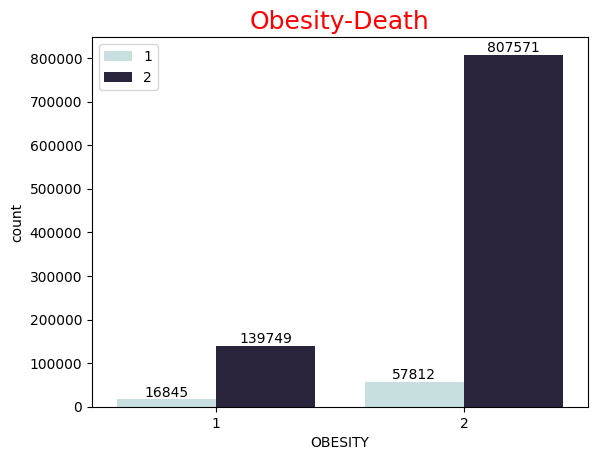

In [30]:
ax=sns.countplot(data=covid, x='OBESITY',hue='DEATH', palette='ch:start=.2,rot=-.3')
plt.title("Obesity-Death",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best")
plt.show()

- Obese patients are more likely to die from COVID-19 compared to non-obese patients.

Text(0.5, 1.0, 'Correlation Between Features')

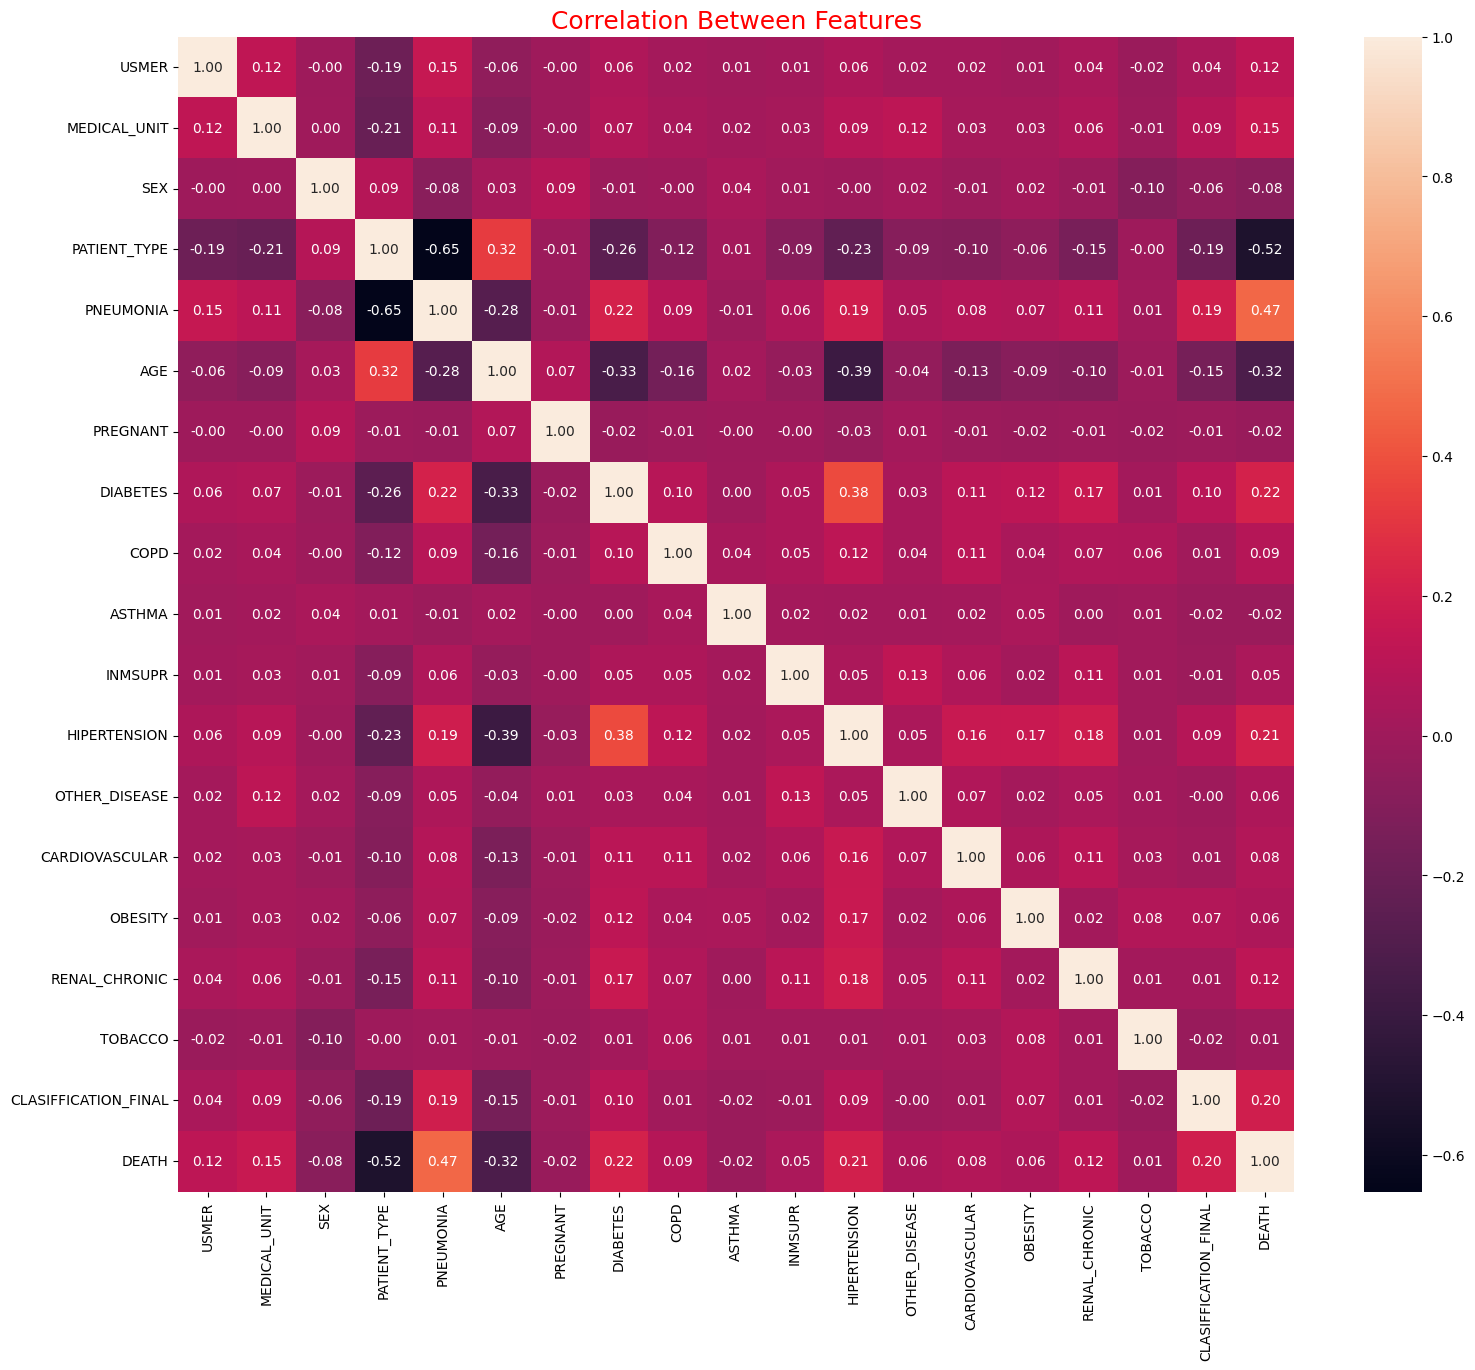

In [31]:
plt.figure(figsize=(18,15))
sns.heatmap(covid.corr(), annot=True, fmt=".2f")
plt.title("Correlation Between Features", fontsize=18, color="red")
plt.show()

# Future Selection

- Drop the features that have low correlation with “DEATH” feature.

In [32]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

covid.drop(columns=unrelevant_columns,inplace=True)

In [33]:
covid.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


## Preparing the categorical features which are not binary

In [34]:
covid = pd.get_dummies(covid, columns=["MEDICAL_UNIT", "CLASIFFICATION_FINAL"], drop_first=True)
covid.head()

,USMER,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,DEATH,MEDICAL_UNIT_2,MEDICAL_UNIT_3,...,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,2,1,1,65,2,1,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,72,2,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2,2,55,1,2,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,1,2,53,2,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,2,68,1,1,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Determining the “x” and “y”

In [35]:
X = covid.drop(columns="DEATH")
Y = covid["DEATH"]

Text(0.5, 1.0, 'Death Distribution')

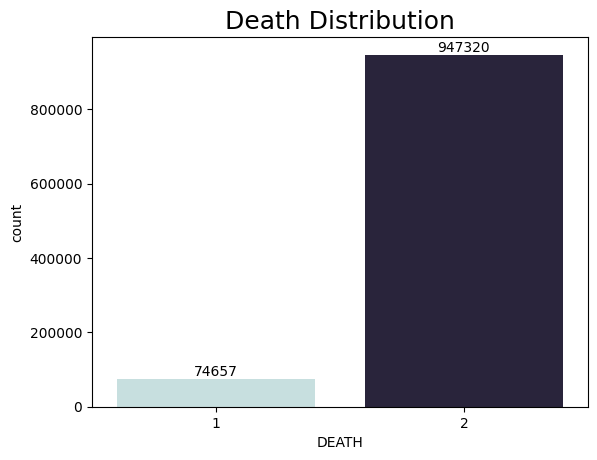

In [36]:
ax = sns.countplot(x=Y,palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title('Death Distribution', fontsize=18)
plt.show()

- There is an imbalance Dataset Problem

**How To Solve Imbalance Dataset Problem**
* Loading More Datas
* Changing The Perfomance Metrics
* Resampling (Undersampling or Oversampling)
* Changing The Algorithm
* Penalized Models etc.

## Under Sampling Test data


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

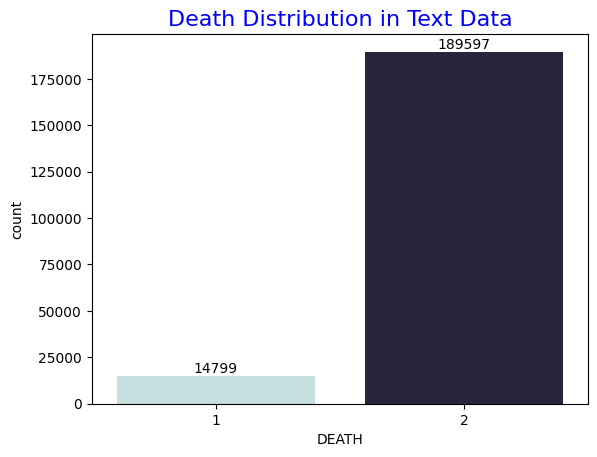

In [67]:
ax = sns.countplot(x=Y_test, palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title("Death Distribution in Text Data", fontsize=16, color='b')
plt.show()

In [68]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_test, Y_test = undersampler.fit_resample(X_test, Y_test)

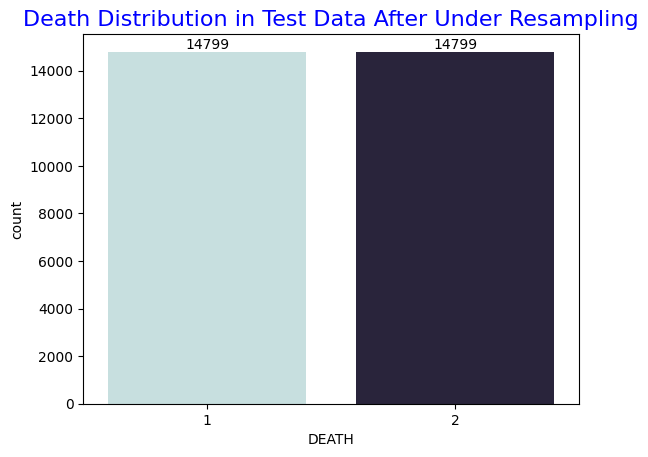

In [70]:
ax = sns.countplot(x=Y_test, palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title("Death Distribution in Test Data After Under Resampling", fontsize=16, color='b')
plt.show()

## Augment Train data

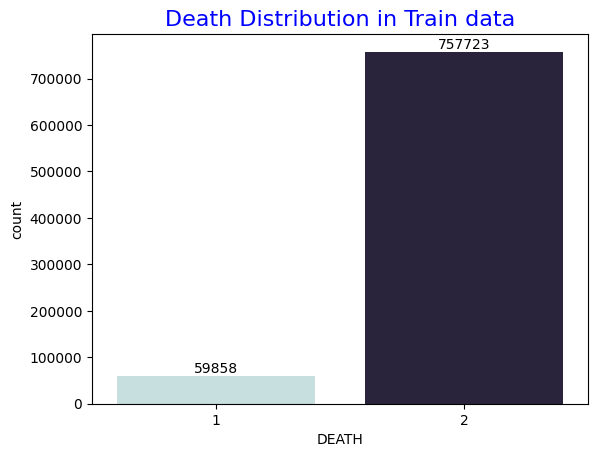

In [72]:
ax = sns.countplot(x=Y_train, palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title("Death Distribution in Train data", fontsize=16, color='b')
plt.show()

In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_train, Y_train = ada.fit_resample(X_train, Y_train)

KeyboardInterrupt: ignored

Text(0.5, 1.0, 'Death Distribution After Resampling')

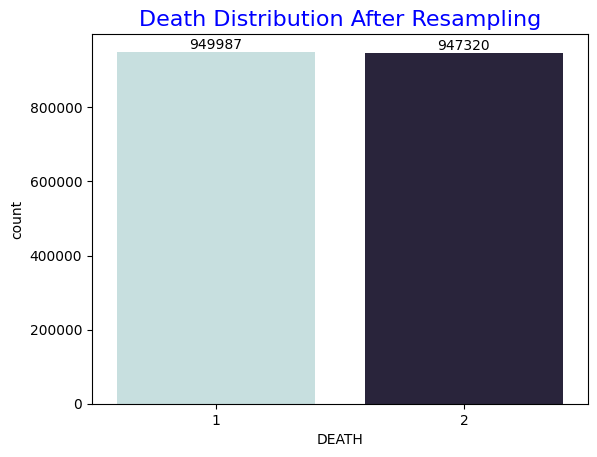

In [39]:
ax = sns.countplot(x=Y_train, palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title("Death Distribution After Resampling", fontsize=16, color='b')

# Methods

## Optimizer


In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn import metrics

class Optimizer:
    def __init__(self, model, X_train, X_test, Y_train, Y_test):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.clf = None
        self.space = None
        self.trials = Trials()
        self.best_params = None

    def get_space(self):
        if self.model == 'knn':
            self.space = {
                'n_neighbors': hp.quniform('n_neighbors', 5, 20, 1),
                'weights': hp.choice('weights', ['uniform', 'distance']),
                'metric' : hp.choice('metric', ['minkowski','euclidean','manhattan'])
            }
        elif self.model == 'dt':
            self.space = {
                'max_depth': hp.quniform('max_depth', 3, 20, 1),
                'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
                'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1),
                'criterion': hp.choice('criterion', ['gini', 'entropy']),
            }
        elif self.model == 'rf':
            self.space = {
                'n_estimators': hp.quniform('n_estimators', 100, 500, 10),
                'max_depth': hp.quniform('max_depth', 3, 20, 1),
                'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
                'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 20, 1),
                'criterion': hp.choice('criterion', ['gini', 'entropy']),
            }
        elif self.model == 'xgb':
            self.space = {
                'max_depth': hp.quniform("max_depth", 3, 20, 1),
                'gamma': hp.uniform('gamma', 1, 9),
                'reg_alpha': hp.uniform('reg_alpha', 0, 10.),
                'reg_lambda': hp.uniform('reg_lambda', 1, 10.),
                'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                'min_child_weight': hp.quniform('min_child_weight', 0, 10, 1),
                'n_estimators': hp.quniform('n_estimators', 100, 500, 10),
            }
        elif self.model == 'gnb':
            self.space = {
                'var_smoothing': hp.loguniform('var_smoothing', -9, 0)
            }
        elif self.model == 'bnb':
            self.space = {
                'alpha': hp.uniform('alpha', 0, 100)
            }


    def get_model(self):
        if self.model == 'knn':
            self.clf = KNeighborsClassifier(
                n_neighbors=int(self.space['n_neighbors']),
                weights=self.space['weights'],
                metric=self.space['metric' ]
            )
        elif self.model == 'dt':
            self.clf = DecisionTreeClassifier(
                max_depth=int(self.space['max_depth']),
                min_samples_split=int(self.space['min_samples_split']),
                min_samples_leaf=int(self.space['min_samples_leaf']),
                criterion=self.space['criterion']
            )
        elif self.model == 'rf':
            self.clf = RandomForestClassifier(
                n_estimators=int(self.space['n_estimators']),
                max_depth=int(self.space['max_depth']),
                min_samples_split=int(self.space['min_samples_split']),
                min_samples_leaf=int(self.space['min_samples_leaf']),
                criterion=self.space['criterion']
            )
        elif self.model == 'xgb':
            self.clf = xgb.XGBClassifier(
                n_estimators=int(self.space['n_estimators']),
                max_depth=int(self.space['max_depth']),
                gamma=self.space['gamma'],
                reg_alpha=self.space['reg_alpha'],
                reg_lambda=self.space['reg_lambda'],
                min_child_weight=int(self.space['min_child_weight']),
                colsample_bytree=self.space['colsample_bytree']
            )
        elif self.model == 'gnb':
            self.clf = GaussianNB(var_smoothing=float(self.space['var_smoothing']))
        elif self.model == 'bnb':
            self.clf = BernoulliNB(alpha=float(self.space['alpha']))

    def objective(self, space):
        self.space = space

        self.get_model()
        self.clf.fit(self.X_train, self.Y_train)

        pred = self.clf.predict(self.X_test)
        f1 = f1_score(self.Y_test, pred, average='weighted')

        return {'loss': -f1, 'status': STATUS_OK, 'prediction': pred}

    def search(self):
        self.get_space()
        best_hyperparams = fmin(
            fn=self.objective,
            space=self.space,
            algo=tpe.suggest,
            max_evals=100,
            trials=self.trials
        )
        self.best_params = best_hyperparams

    def get_results(self):
        return self.trials
    def get_best_params(self):
        return self.best_params

## Scaling the numeric feature

In [42]:
minmax_scaler = MinMaxScaler()
X_train['AGE'] = minmax_scaler.fit_transform(X_train.loc[:,['AGE']])

## Decision Tree

In [ ]:
start_time = time.time()
dt = DecisionTreeClassifier(
                max_depth=3,
                min_samples_split=2,
                min_samples_leaf=1,
                criterion='gini'
            )
dt.fit(X_train, Y_train)

end_time = time.time()
Y_pred = dt.predict(X_test)
execution_time_normal_dt = end_time - start_time

f1_dt_before = f1_score(Y_test, Y_pred, average='binary')

print(f"Execution time: {execution_time_normal_dt}")
print("F1: ", f1_dt_before)

### Optimize

In [49]:
start_time = time.time()
op_dt = Optimizer('dt', X_train, X_test, Y_train, Y_test)
op_dt.search()
end_time = time.time()
execution_time_op_dt = end_time - start_time

dt_results = op_dt.get_results()
op_f1_dt = next(filter(lambda x: x['loss'] == min(dt_results.losses()), dt_results.results), None)
print("Execution time:", execution_time_op_dt)

100%|██████████| 100/100 [10:46<00:00,  6.46s/trial, best loss: -0.8899855063335659]
Execution time: 646.1271567344666


In [50]:
op_dt.get_best_params()

{'criterion': 1,
 'max_depth': 4.0,
 'min_samples_leaf': 17.0,
 'min_samples_split': 3.0}

In [52]:
dt_params = op_dt.get_best_params()
dt_params['criterion'] = ['gini', 'entropy'][dt_params['criterion']]
dt_params['max_depth'] = int(dt_params['max_depth'])
dt_params['min_samples_leaf'] = int(dt_params['min_samples_leaf'])
dt_params['min_samples_split'] = int(dt_params['min_samples_split'])

dt_op = DecisionTreeClassifier(**dt_params)
dt_op.fit(X_train, Y_train)
Y_pred = dt_op.predict(X_test)


f1_dt_after = f1_score(Y_test, Y_pred, average='binary')
print("F1: ", f1_dt_after)

F1:  0.8943317785439058


## Random Forest

In [ ]:
start_time = time.time()
rf = RandomForestClassifier(
                n_estimators=100,
                max_depth=3,
                min_samples_split=2,
                min_samples_leaf=1,
                criterion='gini'
            )
rf.fit(X_train, Y_train)

end_time = time.time()
Y_pred = rf.predict(X_test)
execution_time_normal_rf = end_time - start_time

f1_rf_before = f1_score(Y_test, Y_pred, average='binary')


print(f"Execution time: {execution_time_normal_rf}")
print("F1: ", f1_rf_before)

Execution time: 86.9386215209961
F1:  0.896121349345826


### Optimize

In [53]:
start_time = time.time()
op_rf = Optimizer('rf', X_train, X_test, Y_train, Y_test)
op_rf.search()
end_time = time.time()
execution_time_op_rf = end_time - start_time

rf_results = op_rf.get_results()
op_f1_rf = next(filter(lambda x: x['loss'] == min(rf_results.losses()), rf_results.results), None)
print("Execution time:", execution_time_op_rf)

  5%|▌         | 5/100 [38:13<12:06:17, 458.71s/trial, best loss: -0.8909214725664141]


KeyboardInterrupt: ignored

In [51]:
rf_params = op_rf.get_best_params()
rf_params['criterion'] = ['gini', 'entropy'][rf_params['criterion']]
rf_params['n_estimators'] = int(rf_params['n_estimators'])
rf_params['max_depth'] = int(rf_params['max_depth'])
rf_params['min_samples_split'] = int(rf_params['min_samples_split'])
rf_params['min_samples_leaf'] = int(rf_params['min_samples_leaf'])

rf_op = RandomForestClassifier(**rf_params)
rf_op.fit(X_train, Y_train)

Y_pred = rf_op.predict(X_test)
f1_rf_after = f1_score(Y_test, Y_pred, average='binary')

print("F1:", f1_rf_after)

NameError: ignored

## Gaussian Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
start_time = time.time()
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
end_time = time.time()
Y_pred = gnb.predict(X_test)
execution_time_normal_gnb = end_time - start_time


f1_gnb_before = f1_score(Y_test, Y_pred, average='binary')


print("F1: ", f1_gnb_before)

F1:  0.6671877150206597


### Optimize

In [58]:
start_time = time.time()
op_gnb = Optimizer('gnb', X_train, X_test, Y_train, Y_test)
op_gnb.search()
end_time = time.time()
execution_time_op_gnb = end_time - start_time

gnb_results = op_gnb.get_results()
op_f1_gnb = next(filter(lambda x: x['loss'] == min(gnb_results.losses()), gnb_results.results), None)
print("Execution time:", execution_time_op_gnb)

100%|██████████| 100/100 [02:32<00:00,  1.52s/trial, best loss: -0.3497123284224352]
Execution time: 152.3987627029419


In [59]:
gnb_op = GaussianNB(**op_gnb.get_best_params())
gnb_op.fit(X_train, Y_train)

gnb_op.predict(X_test)

f1_gnb_after = f1_score(Y_test, Y_pred, average='binary')

print("F1:", f1_gnb_after)

F1: 0.8943317785439058


## Bernoulli Naive Bayes

In [45]:
from sklearn.naive_bayes import BernoulliNB
start_time = time.time()
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)


end_time = time.time()
Y_pred = bnb.predict(X_test)
execution_time_normal_bnb = end_time - start_time


f1_bnb_before = f1_score(Y_test, Y_pred, average='binary')

print("F1: ", f1_bnb_before)

F1:  0.6810264957474448


### Optimize

In [55]:
start_time = time.time()
op_bnb = Optimizer('bnb', X_train, X_test, Y_train, Y_test)
op_bnb.search()
end_time = time.time()
execution_time_op_bnb = end_time - start_time

bnb_results = op_bnb.get_results()
op_f1_bnb = next(filter(lambda x: x['loss'] == min(bnb_results.losses()), bnb_results.results), None)
print("Execution time:", execution_time_op_bnb)
# print(f'F1 score: {-op_f1_bnb["loss"]}')

100%|██████████| 100/100 [02:58<00:00,  1.78s/trial, best loss: -0.6551448601142027]
Execution time: 178.30916094779968
F1 score: 0.6551448601142027


In [56]:
bnb_op = BernoulliNB(**op_bnb.get_best_params())
dt_op.fit(X_train, Y_train)
Y_pred = dt_op.predict(X_test)


f1_bnb_after = f1_score(Y_test, Y_pred, average='binary')

print("F1:", f1_bnb_after)

F1: 0.8943317785439058


## K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

end_time = time.time()
Y_pred = knn.predict(X_test)
execution_time_normal_knn = end_time - start_time

f1_knn_before = f1_score(Y_test, Y_pred, average='binary')

print("F1: ", f1_knn_before)

### Optimize

In [ ]:
start_time = time.time()
op_knn = Optimizer('knn', X_train, X_test, Y_train, Y_test)
op_knn.search()
end_time = time.time()
execution_time_op_knn = end_time - start_time

knn_results = op_knn.get_results()
op_f1_knn = next(filter(lambda x: x['loss'] == min(knn_results.losses()), knn_results.results), None)
print("Execution time:", execution_time_op_knn)
print(f'F1 score: {-op_f1_knn["loss"]}')

In [ ]:
knn_params = op_knn.get_best_params()
knn_params['weights'] = ['uniform', 'distance'][knn_params['weights']]
knn_params['metric'] = ['minkowski','euclidean','manhattan'][knn_params['metric']]
knn_params['n_neighbors'] = int(knn_params['n_neighbors'])

knn_op = KNeighborsClassifier(**op_knn.get_best_params())
knn_op.fit(X_train, Y_train)

y_pred = knn_op.predict(X_test)
f1_knn_after = f1_score(Y_test, Y_pred, average='binary')

print("F1: ", f1_knn_after)

## Save models


In [ ]:
# Lên mạng search pickle xài pickle save model lại giùm i :))) mệt quá


# Visualize Results

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

labels_1 = ["Normal"]*5
labels_2 = ["Optimize"]*5
labels_list = labels_1 + labels_2

algos_list = ["Dt", "Rf", "GNB", "BNB", "Knn"]

normal_results = np.array([f1_dt_before, f1_rf_before, f1_gnb_before, f1_bnb_before, f1_knn_before])
op_results = - np.array([op_f1_dt["loss"], op_f1_rf["loss"], op_f1_gnb["loss"], op_f1_bnb["loss"], op_f1_knn["loss"]])

final_results = np.append(normal_results, op_results)
final_result_dict = {"result": final_results, "algos": algos_list*2, "Type": labels_list}

df_result = pd.DataFrame(final_result_dict)
sns.set_theme()
plt.ylim(0, 0.95)
ax1 = sns.barplot(data=df_result, x="algos", y="result", hue="Type")
ax1.legend(loc='upper right')
ax1.set_xlabel("Algorithm")
ax1.set_ylabel("F1_Score")

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), ".3f"),
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom')

plt.show()